<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01794299/blob/main/Semana_6_Data_Analysis_with_Python_(IBM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ciencia y análisis de Datos

Matrícula: A01794299

Nombre: Eunice Ornelas Rodrí­guez

# **Data Analysis with Python**

# **Module 3 - Exploratory Data Analysis**
**Exploratory Data Analysis (EDA)**

Es un enfoque para analizar datos con el propósito de:
 
- Sumarizar características principales de los datos, tener mejor entendimiento del dataset.
- Descubrir relaciones entre diferentes variables.
- Extraer variables importantes para el problema que está tratando de resolverse.

**Estadísticas descriptivas**

Ayudan a describir características básicas de un dataset y obtiene un resumen corto acerca de la muestra y las medidas de los datos.

**Método describe()**

Sumariza estadísticas usando el método describe de pandas.

Muestra en una tabla la media, el número total de data points, desviación estándar, los cuartiles y valores extremos. Todos los valores NaN son automáticamente descartados en estas estadísticas.

Esta función da una idea clara de la distribución de las variables.


In [ ]:
import pandas as pd
import numpy as np
#importar dataset
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

In [37]:
#convertir dataset en csv, especificando que las columnas no tienen nombres especÃƒÂ­ficos
df = pd.read_csv(path, header=None)
#primeras 5 filas del dataset
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
#asignamos los nombres al dataset
df.columns = headers
df=df.replace('?',np.NaN)
df=df.dropna(subset=['normalized-losses'],axis=0)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [ ]:
#método describe
df.describe()

,0,9,10,11,12,13,16,20,23,24
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


**Método value_counts()**

Sumarizar los datos categóricos usando el método value_counts.

También se pueden tener variables categóricas en el dataset. Estas son variables que pueden ser divididas en diferentes categorías o grupos y tener valores discretos. 

In [39]:
drive_wheels_counts=df['drive-wheels'].value_counts()
drive_wheels_counts

fwd    106
rwd     50
4wd      8
Name: drive-wheels, dtype: int64

In [ ]:
#cambiar nombre de columna para que sea más fácil de leer
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts.index.name='drive-wheels'

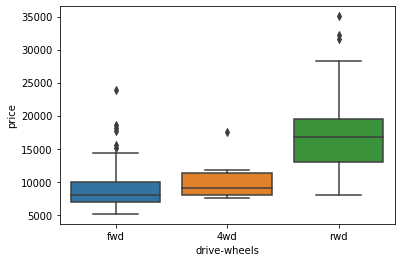

In [38]:
#visualizar datos con boxplot
#plasma la media de los datos, el cuartil superior que muestra donde está el 
#75% de los datos, el cuartil inferior que muestra donde está el 25% de los datos
#también muestra los outliers como puntos individuales que ocurren por fuera de los extremos
#superiores e inferiores
import seaborn as sns
df.explode('price')
df['price'] = df['price'].astype('int')
sns.boxplot(x="drive-wheels", y="price",data=df)

Text(0.5, 0, 'Price')

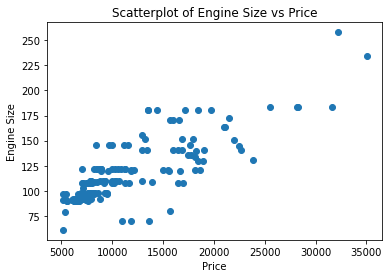

In [43]:
#Scatter plot
#Cada observación es representada como un punto
#muestra la relación entre dos variables
#variable independiente en el axis X
#variable independiente en el axis y
import matplotlib.pyplot as plt
y=df["engine-size"]
x=df["price"]
plt.scatter(x,y)
plt.title("Scatterplot of Engine Size vs Price")
plt.ylabel("Engine Size")
plt.xlabel("Price")

**GroupBy**

**Grouping data**

Agrupar todos los datos por diferentes tipos y comparar los resultados de esos diferentes tipos entre ellos.

El método groupby es usado en variables categóricas, agrupa los datos en diferentes subsets de acuerdo a las categorías de la variable.

Puedes agrupar por una sola variable o por múltiples.

In [66]:
#metodo groupby
#elegir las columnas en las que estamos interesados
df_test =df[['drive-wheels','body-style','price']]
#agrupar los datos reducidos de acuerdo a las columnas elegidas
#precio promedio con la media de cada grupo
df_grp=df_test.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,hardtop,8249.000000
4,fwd,hatchback,7989.800000
5,fwd,sedan,9538.509804
6,fwd,wagon,8829.222222
7,rwd,convertible,26362.500000
8,rwd,hardtop,14365.750000
9,rwd,hatchback,14376.071429


In [50]:
#metodo Pivot()
#una variable desplegada en las columnas y otra en las filas
df_pivot=df_grp.pivot(index='drive-wheels',columns='body-style')
df_pivot

price                                                    
body-style   convertible   hardtop     hatchback         sedan         wagon
drive-wheels                                                                
4wd                  NaN       NaN   7603.000000  12647.333333   9095.750000
fwd                  NaN   8249.00   7989.800000   9538.509804   8829.222222
rwd              26362.5  14365.75  14376.071429  18318.576923  19282.000000

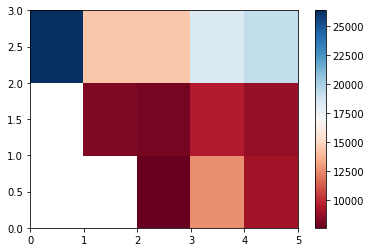

In [51]:
#heatmaps
#se grafica la variable objetivo sobre multiples variables
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

**Análisis of Variance (ANOVA)**

Comparación estadística de grupos.

Se usa para encontrar la correlación entre diferentes grupos de la variable categórica.

¿Qué obtenemos de ANOVA?

F-test score: variación entre las medias del grupo muestra dividido por variación en base al grupo muestra.

p-value: grado de confianza.

Una F pequeña implica una correlación pobre entre la variable categorías y la variable objetivo.

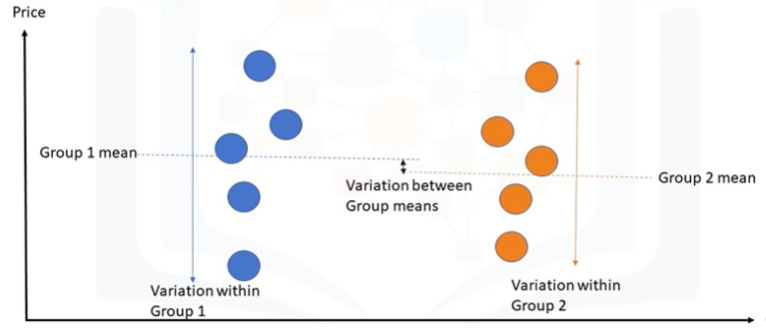

In [ ]:
#ANOVA entre "Honda" y "Subaru"
from scipy import stats
df_anova=df[["make","price"]]
grouped_anova=df_anova.groupb([["make"]])

anova_results_l=stats.f_oneway(grouped_anova.get_group("honda")["price"],grouped_anova.get_group("subaru")["price"])

**Correlación**

Es una métrica estadística para medir a que punto diferentes variable son interdependientes.

Si una variable cambia, ¿que efecto surte en las otras variables?

**Relación positiva linear**

(0.0, 37779.84642994587)

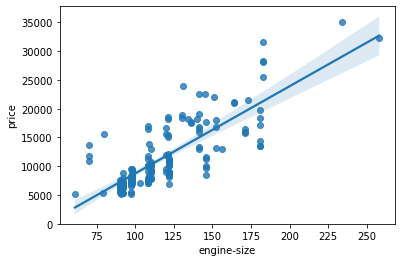

In [58]:
import matplotlib.pyplot as plt
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

**Relación negativa linear**

(0.0, 37096.14870834996)

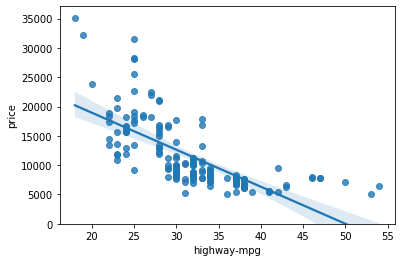

In [59]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

In [ ]:
#relación pobre entre dos caracteristicas
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

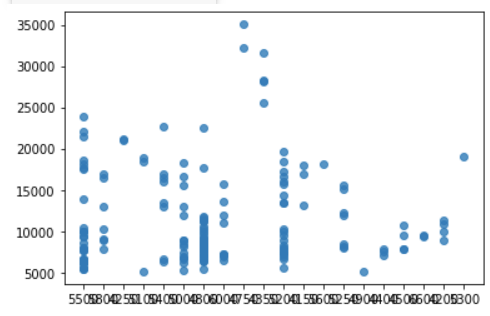

In [ ]:
#Pearson correlation 
#mide la fuerza entre las correlaciones de dos características
#coeficiente de correlación, p-value
pearson_coef,p_value=stats.pearsonr(df['horsepower'],df['price'])

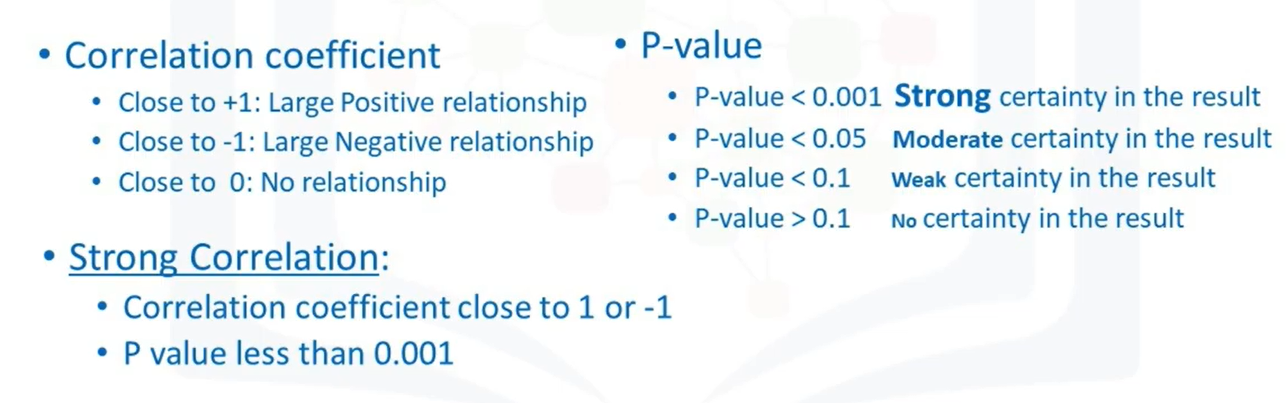

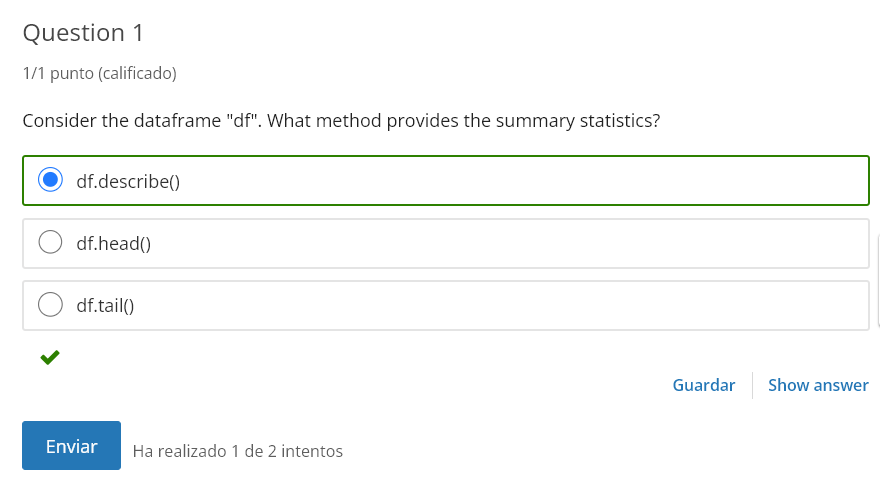

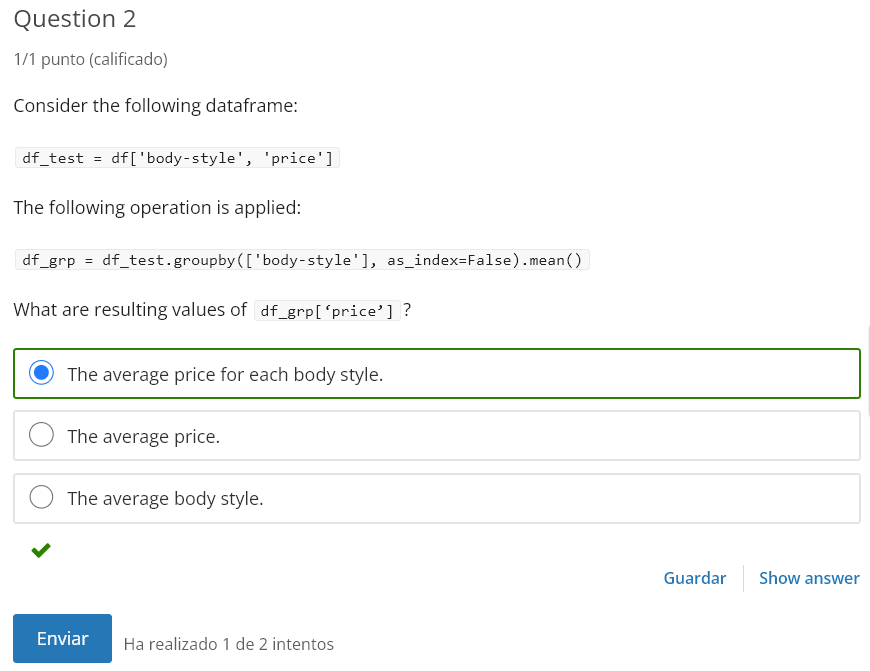

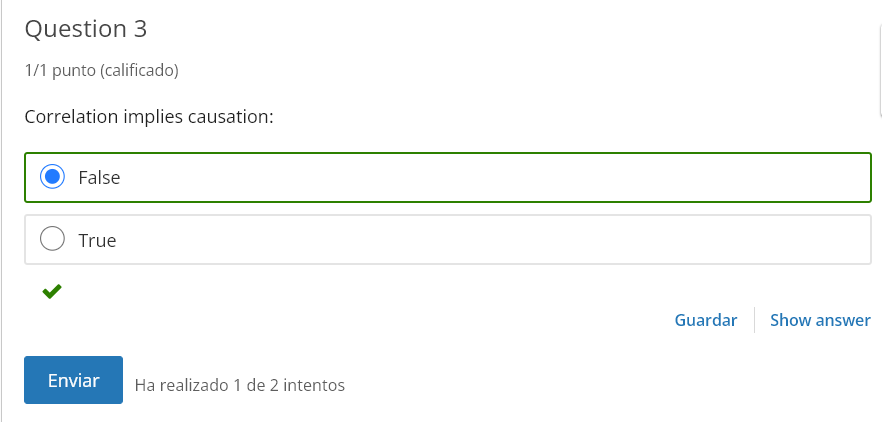

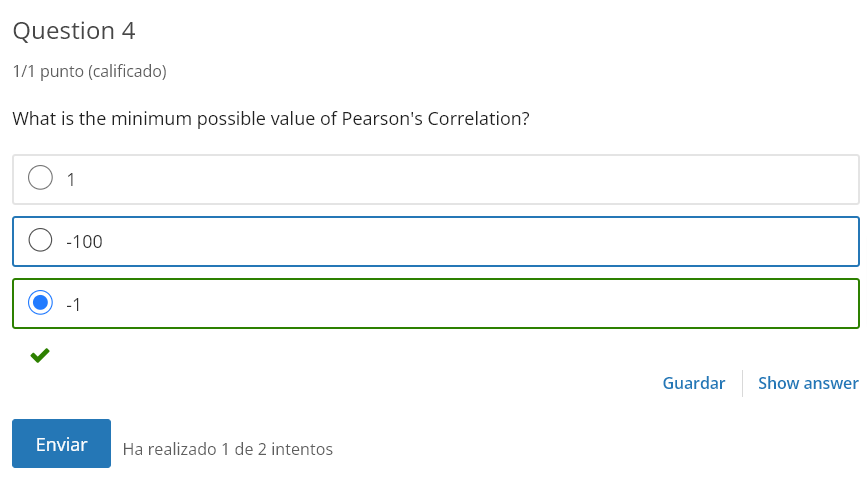

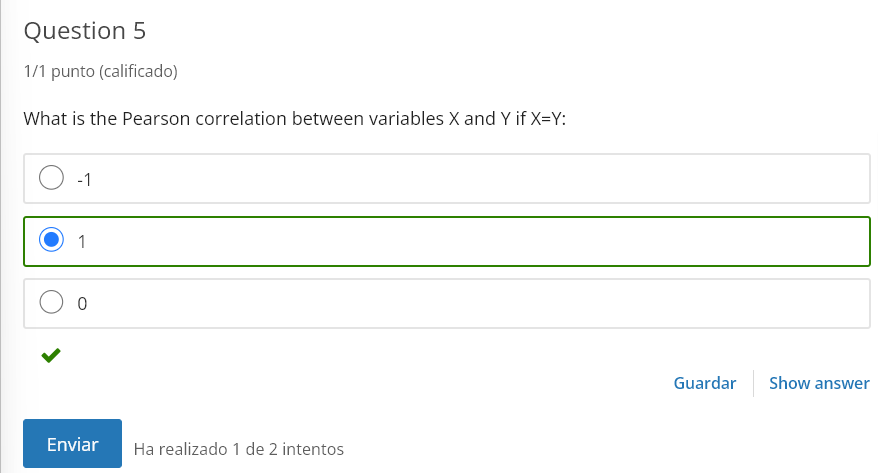

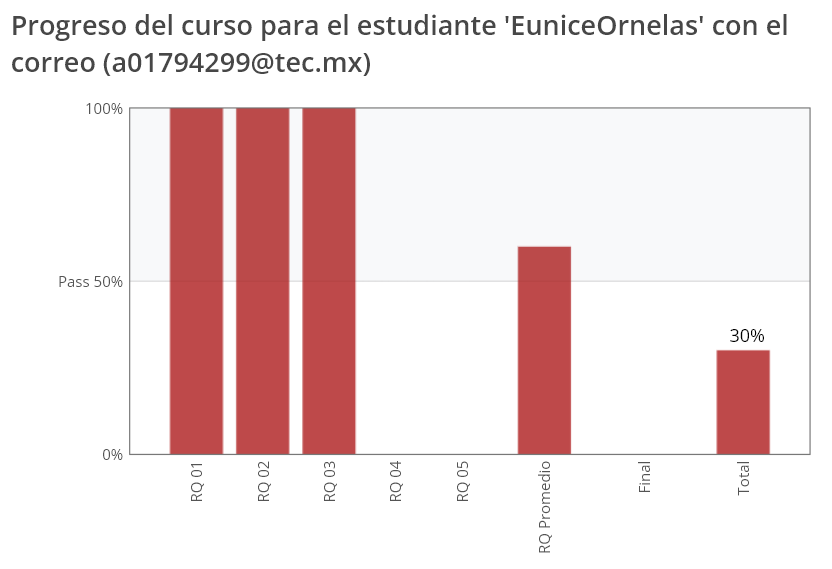